## Amazon Products Co-Purchasing Network
### Data <a link = 'http://snap.stanford.edu/data/amazon0505.html'> obtained </a> on 5.12.2019, 10:02 


Copyright 2020 Firas Swidan†

Licensed under the Apache License, Version 2.0 (the "License"); you may not
use this file except in compliance with the License. You may obtain a copy of
the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations under
the License.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import network_analysis as na

In [3]:
# ! gunzip -c amazon0505.txt.gz | head -n 5

In [4]:
g = nx.read_edgelist("amazon0505.txt.gz", create_using = nx.DiGraph)

In [5]:
na.network_summary(g)

Nodes: 410236
Edges: 2439437
Mean degree: 11.892847044140446
Components number: 1
Largest component node percentage: 1.0
Calculating best minimal value for power law fit
Powerlaw Alpha: 3.1319685181276755
Clustering coefficient: 0.16234935174360876
Average local clustering: 0.4063961524328947


In [6]:
nx.is_strongly_connected(g)

False

In [9]:
in_degrees = g.in_degree()

In [10]:
out_degrees = g.out_degree()

In [11]:
in_degrees_values = dict(in_degrees).values()

In [12]:
out_degrees_values = dict(out_degrees).values()

### Nodes' out-degree histogram

(array([ 13433.,      0.,  11146.,      0.,  14935.,      0.,  15709.,
             0.,  15091.,      0.,  13945.,      0.,  12599.,      0.,
         11795.,      0.,  11285.,      0.,  12827., 277471.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

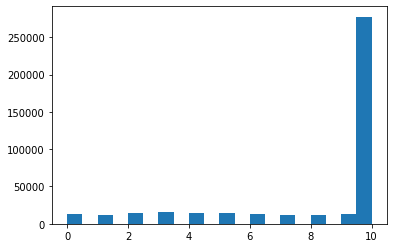

In [13]:
plt.figure()
plt.hist(out_degrees_values, bins = 20)

### Nodes' in-degree histogram

In [14]:
np.min(list(in_degrees_values))

0

(array([4.09664e+05, 4.67000e+02, 6.70000e+01, 2.40000e+01, 4.00000e+00,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   0.,  138.,  276.,  414.,  552.,  690.,  828.,  966., 1104.,
        1242., 1380., 1518., 1656., 1794., 1932., 2070., 2208., 2346.,
        2484., 2622., 2760.]),
 <a list of 20 Patch objects>)

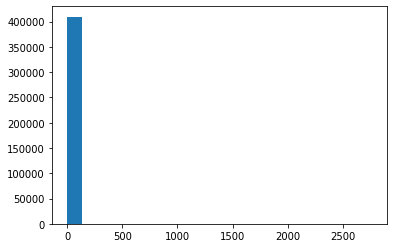

In [15]:
plt.hist(in_degrees_values, bins = 20)

## Explore nodes with big in-degree

In [16]:
in_degrees_dic = { nd: [x for x, y in g.in_edges(nd)] for nd, in_degree in sorted(dict(in_degrees).items(), key = lambda x: x[1], reverse = True)[0:5] }

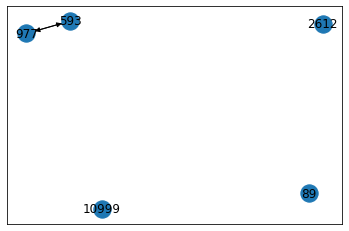

In [17]:
nx.draw_networkx(nx.subgraph(g, in_degrees_dic.keys()))

In [18]:
in_degrees_nodes = set()
for x in in_degrees_dic.items():
    in_degrees_nodes = in_degrees_nodes | set(x[1])

In [19]:
len(in_degrees_nodes)

9787

In [20]:
in_degrees_nodes = in_degrees_nodes - in_degrees_dic.keys()

In [21]:
high_degree_graph = nx.Graph()

In [22]:
high_degree_graph.add_nodes_from(in_degrees_dic.keys(), bipartite = 0)

In [23]:
high_degree_graph.add_nodes_from(in_degrees_nodes, bipartite = 1)

In [24]:
high_degree_graph.add_edges_from([(x, y) for x, lst in in_degrees_dic.items() for y in lst])

In [25]:
len(high_degree_graph.nodes())

9790

In [26]:
len(high_degree_graph.edges())

10760

In [27]:
bipartite_degrees = nx.degree(high_degree_graph)

In [28]:
in_nodes_degrees = [bipartite_degrees[x] for x in in_degrees_nodes]

(array([8.865e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.680e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <a list of 20 Patch objects>)

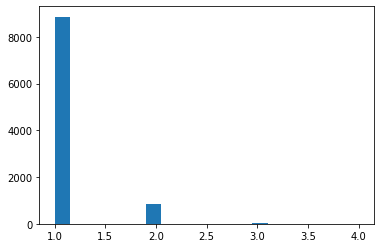

In [29]:
plt.hist(in_nodes_degrees, bins = 20)

In [30]:
set(in_nodes_degrees)

{1, 2, 3, 4}

In [31]:
pd.Series(in_nodes_degrees).sort_values()

0       1
6352    1
6353    1
6354    1
6355    1
       ..
6860    3
2361    3
8968    3
2799    4
4873    4
Length: 9785, dtype: int64

## Exploring the in- and out-degrees generative models

In [32]:
import network_analysis as nan

In [33]:
%load_ext memory_profiler

In [34]:
%%timeit -r 1 -n 1
%%memit

df = nan.simulate_labeled_graphs(1000, 1000)

peak memory: 1985.23 MiB, increment: 7.86 MiB
43.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
df.head()

,Target,degs std %,skew,skew p-val
0,PA,0.013340,5.036630,9.402827e-160
1,PA,0.010395,5.141521,2.536014e-162
2,PA,0.008513,5.433486,2.577982e-169
3,PA,0.013045,4.557804,1.292685e-147
4,PA,0.010064,5.653487,1.942678e-174


In [36]:
df.describe()

,degs std %,skew,skew p-val
count,3000.000000,3000.000000,3.000000e+03
mean,0.003784,2.274053,5.439218e-02
std,0.004532,3.116960,1.367291e-01
min,0.000000,-2.484520,0.000000e+00
25%,0.000654,0.204258,6.558999e-155
50%,0.001537,0.465006,6.137522e-09
75%,0.006663,4.842294,5.260820e-03
max,0.015824,22.350464,8.590662e-01


In [37]:
set(df['Target'])

{'PA', 'SW_H', 'SW_L'}

In [38]:
df['Target_num'] = df['Target'].map({'PA': 0, 'SW_H': 1, 'SW_L': 2})

In [39]:
df['Target_num'].describe()

count    3000.000000
mean        1.000000
std         0.816633
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Target_num, dtype: float64

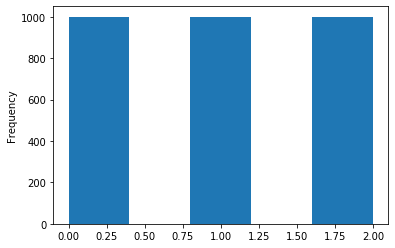

In [40]:
df['Target_num'].plot.hist(bins = 5)

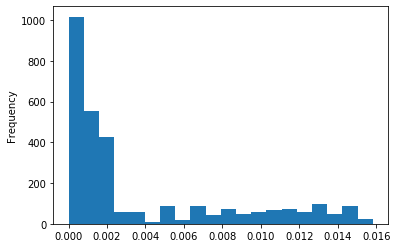

In [41]:
df['degs std %'].plot.hist(bins = 20)

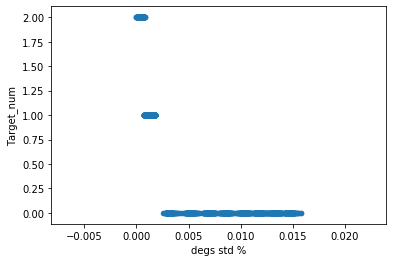

In [42]:
df.plot.scatter('degs std %', 'Target_num')

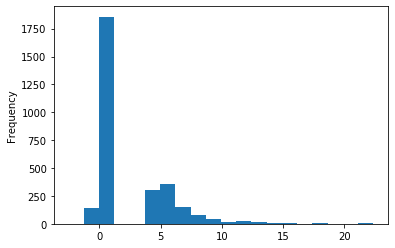

In [43]:
df['skew'].plot.hist(bins = 20)

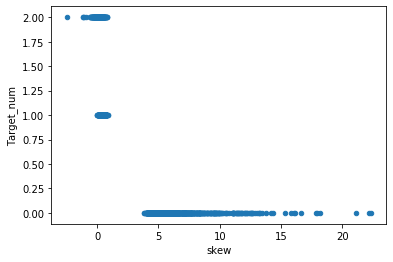

In [44]:
df.plot.scatter('skew', 'Target_num')

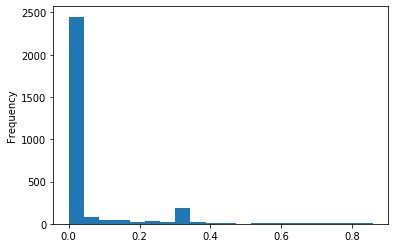

In [45]:
df['skew p-val'].plot.hist(bins = 20)

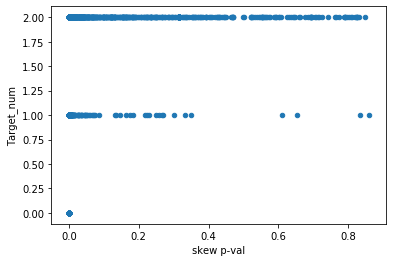

In [46]:
df.plot.scatter('skew p-val', 'Target_num')

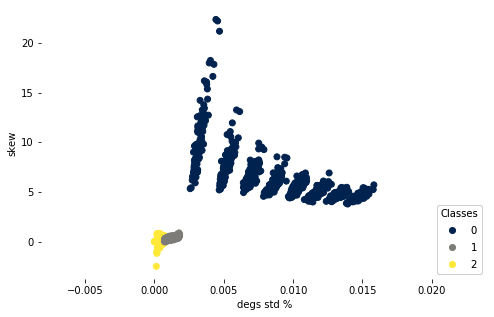

In [47]:
import plotting as plting

plting.classes_colored_scatter(x = 'degs std %', y = 'skew', c = 'Target_num', data = df)

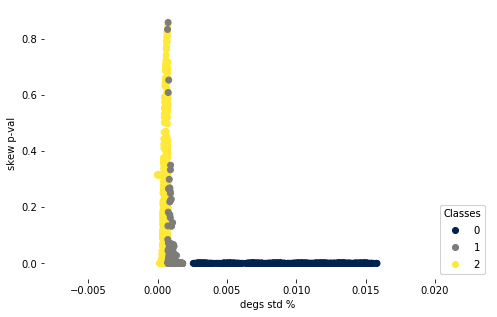

In [48]:
plting.classes_colored_scatter(x = 'degs std %', y = 'skew p-val', c = 'Target_num', data = df)

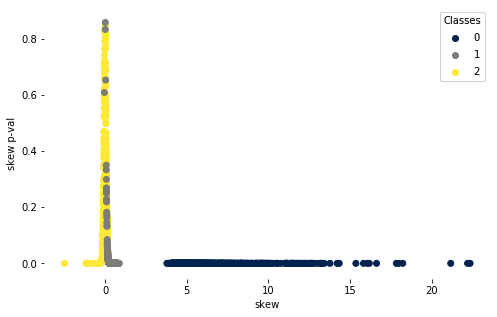

In [49]:
plting.classes_colored_scatter(x = 'skew', y = 'skew p-val', c = 'Target_num', data = df, loc = 'upper right')

## Utilizing ML for determining the generative model

In [50]:
Y = df['Target_num']
X = df[nan.feature_names]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
rfc = RandomForestClassifier(random_state=3, verbose=1, n_jobs=-1)
parameters = {'n_estimators':[25, 50, 75, 100, 125], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(rfc, param_grid=parameters, cv=5)

In [55]:
clf.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 o

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=3,
                                              verbose=1, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [56]:
list(zip(clf.best_estimator_.feature_importances_, nan.feature_names))

[(0.4750084432240215, 'degs std %'),
 (0.3347781977781097, 'skew'),
 (0.19021335899786876, 'skew p-val')]

In [57]:
clf.best_score_

0.9955555555555555

In [58]:
clf.cv_results_

{'mean_fit_time': array([0.18490896, 0.09690533, 0.13778543, 0.15929985, 0.18728786,
        0.05322866, 0.09225059, 0.13806434, 0.16386065, 0.19348717,
        0.05288644, 0.09168906, 0.13879991, 0.16530685, 0.1930913 ]),
 'std_fit_time': array([0.26674006, 0.01257033, 0.00727717, 0.00295006, 0.00148232,
        0.00119873, 0.0023411 , 0.0019992 , 0.00225834, 0.00380415,
        0.0006877 , 0.0009838 , 0.00361908, 0.00182837, 0.00491855]),
 'mean_score_time': array([0.1033133 , 0.10352416, 0.10248771, 0.10244241, 0.10250287,
        0.10252109, 0.10250244, 0.10255671, 0.10246186, 0.102563  ,
        0.1024806 , 0.10254073, 0.10250463, 0.10251274, 0.1025609 ]),
 'std_score_time': array([1.69050364e-03, 2.16377430e-03, 7.19609678e-05, 2.25022683e-05,
        3.04875375e-05, 8.60854976e-05, 3.12419689e-05, 3.78300496e-05,
        9.05915307e-06, 3.66745127e-05, 2.76365701e-05, 5.17070482e-05,
        1.43666533e-05, 2.85300881e-05, 6.09187417e-05]),
 'param_max_depth': masked_array(data=

In [59]:
clf.score(X_test, Y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


0.9946666666666667

In [60]:
clf.predict_proba(np.array(nan.d_graph_in_features(g)).reshape(1, -1))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


array([[0.526922 , 0.0292106, 0.4438674]])

In [61]:
clf.predict_proba(np.array(nan.d_graph_out_features(g)).reshape(1, -1))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


array([[0.046922  , 0.06553631, 0.88754169]])

†Dr Firas Swidan, PhD. firas.swidan@outlook.com
https://www.linkedin.com/in/swidan
POBox  8125,  Nazareth, Israel.
Public key: AAAAB3NzaC1yc2EAAAADAQABAAACAQD6Lt98LolwuA/aOcK0h91ECdeiyG3QKcUOT/CcMEPV64cpkv3jrLLGoag7YtzESZ3j7TLEd0WHZ/BZ9d+K2kRfzuuCdMMhrBwqP3YObbTbSIM6NjUNwbH403LLb3FuYApUt1EvC//w64UMm7h3fTo0vdyVuMuGnkRZuM6RRAXcODM4tni9ydd3ZQKN4inztkeH/sOoM77FStk8E2VYbljUQdY39zlRoZwUqNdKzwD3T2G00tmROlTZ6K5L8i68Zqt6s0XNS6XQvS3zXe0fI6UwuetnDrcVr1Yb8y2T8lfjMG9+9L2aKPoUOlOMMcyqM+oKVvRUOSdrzmtKOljnYC7TqzvsKrfXHvHlqHxxhPp1K7B/YWrHwCDbqp02dXdIaXkkHCIqKFNaY06HEWt4obDxppVhC8IabSb55LQVCCT7J4TFbwp6rID2+Y1L7NEvR3v3oaWSlQIZ+WSG04mwh9/7gRCt7XUoqmEXCCPoHqZXq5sWv193XA57pD5gKoX7Rf2i6UdbduNTMIhQMqcWIaPMBFwxUv/LRQCHnS+mlW2GnIHIHHGS/S46MurZ6BMvcb7fEz/NorVxvh3DbUaVTteMYcikH0y5sPmGECB1d99ENBBSEX6diI+PneFp2sOouQ6gOBWy6WAt3spGfLTOFMPo3bMV/UpktkQPpXkmfd1esQ==